In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
"""!kaggle datasets download -d burak3ergun/loan-data-set
!unzip loan-data-set.zip"""

'!kaggle datasets download -d burak3ergun/loan-data-set\n!unzip loan-data-set.zip'

## Read Data Set

In [3]:
df = pd.read_csv(r'loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Description

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Describe data also include 


In [6]:
df.describe(include = object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Column : 'Loanstatus' total value

In [7]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Checking Nulls

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Two Types of Data
*   Categorical
*   Numerical


In [9]:
# fill null categorical with mode and numerical with mean

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Outlier Detection Handling

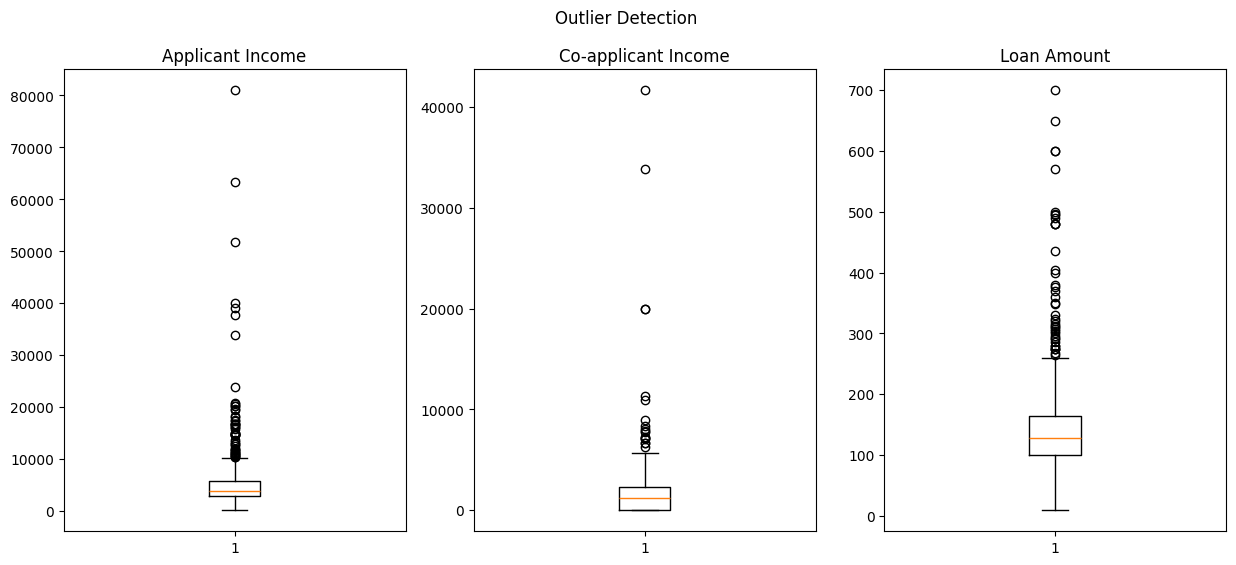

In [10]:
# Box plot for outlier detection applicant income, co-applicant income and loan amount

plt.figure(figsize=(15, 6))
# Boxplots for applicant income
plt.subplot(1, 3, 1)
plt.boxplot(df['ApplicantIncome'])
plt.title('Applicant Income')

# Boxplots for co-applicant income
plt.subplot(1, 3, 2)
plt.boxplot(df['CoapplicantIncome'])
plt.title('Co-applicant Income')

# Boxplots for loan amount
plt.subplot(1, 3, 3)
plt.boxplot(df['LoanAmount'])
plt.title('Loan Amount')

plt.suptitle('Outlier Detection')
plt.show()

## Remove Outliers

In [11]:
# Remove outliers ApplicantIncome
print("Before Removing The Outlier :",df.shape)
df = df[df['ApplicantIncome']< 25000]
print("After Removing The Outlier :",df.shape)

Before Removing The Outlier : (614, 13)
After Removing The Outlier : (607, 13)


In [12]:
# Remove outliers CoapplicantIncome    
print("Before Removing The Outlier :",df.shape)
df = df[df['CoapplicantIncome']< 12000]
print("After Removing The Outlier :",df.shape)

Before Removing The Outlier : (607, 13)
After Removing The Outlier : (603, 13)


In [13]:
# Remove outliers LoanAmount    
print("Before Removing The Outlier :",df.shape)
df = df[df['LoanAmount']< 400]
print("After Removing The Outlier :",df.shape)    

Before Removing The Outlier : (603, 13)
After Removing The Outlier : (591, 13)


## Visualization

<Axes: xlabel='LoanAmount', ylabel='Density'>

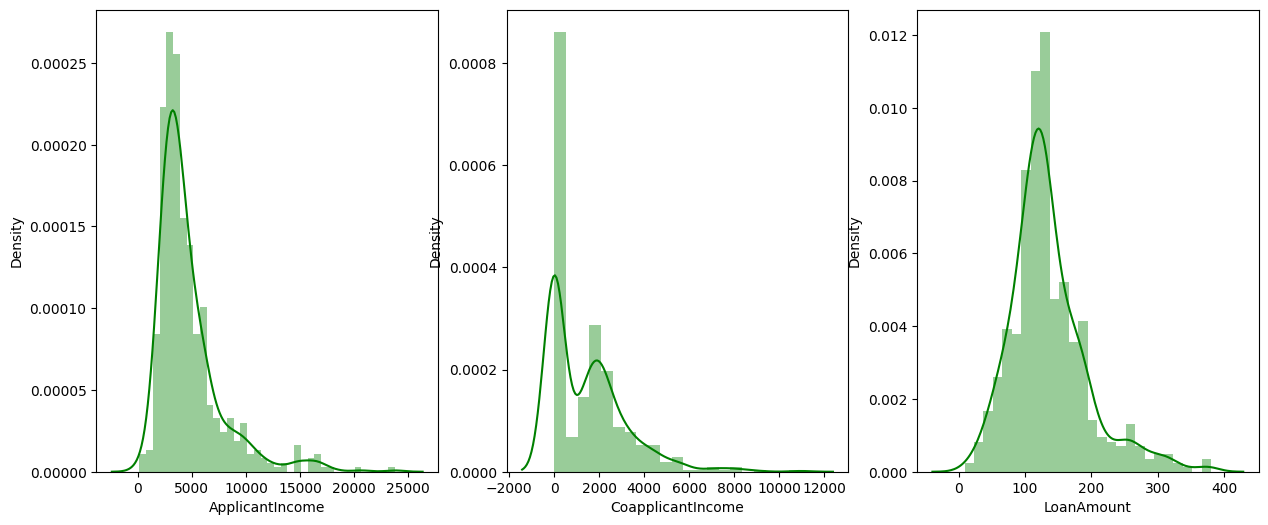

In [14]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'], color='green')

plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'], color='green')

plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'], color='green')

So, applicant and coapplicantincome are not normally distributed

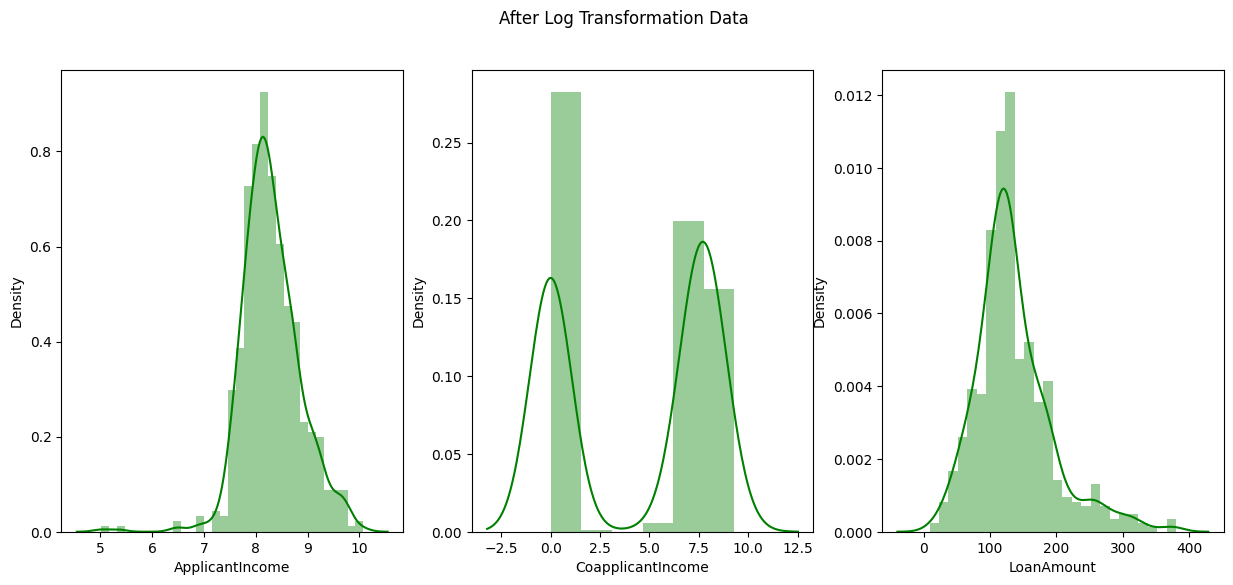

In [15]:
plt.figure(figsize=(15, 6))

# Apply log transformation to 'ApplicantIncome' column
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
# Apply log transformation to 'CoapplicantIncome' column
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'], color = 'green')

plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'], color = 'green')

plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'], color = 'green')

plt.suptitle('After Log Transformation Data')
plt.show()

Now this data is normally distributed

## Dealing with Imbalance Column

In [16]:
# Sperate Numerical Data From Categorical Data

# Numerical Data
num = df.select_dtypes('number').columns.tolist()
print("Numerical Data :", num)

# Categorical Data
cat = df.select_dtypes('object').columns.tolist()
print("Categorical Data :",cat)


Numerical Data : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Data : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


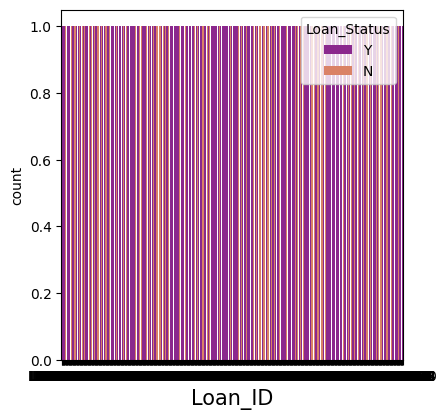

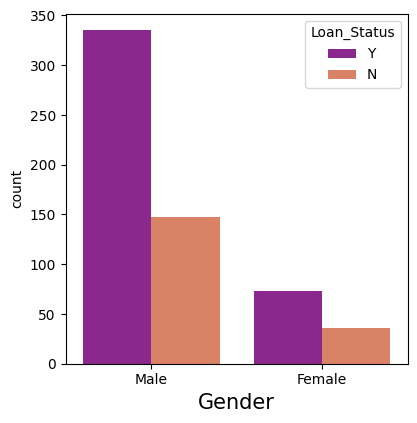

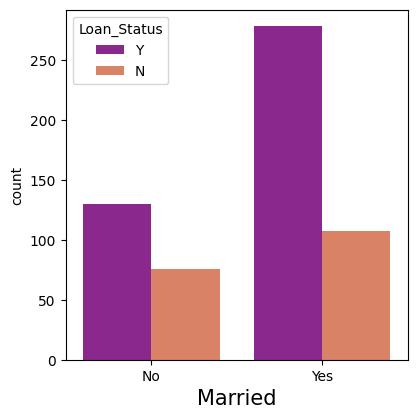

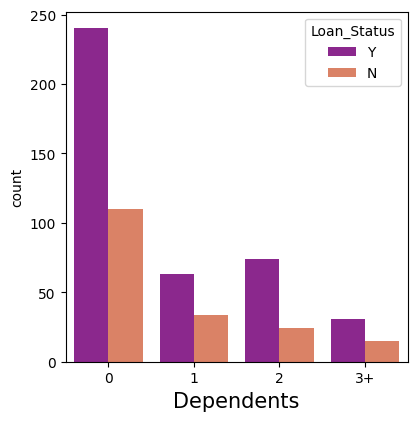

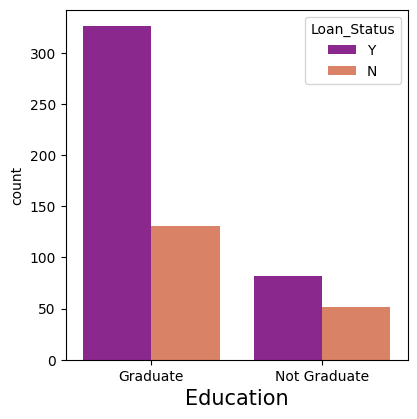

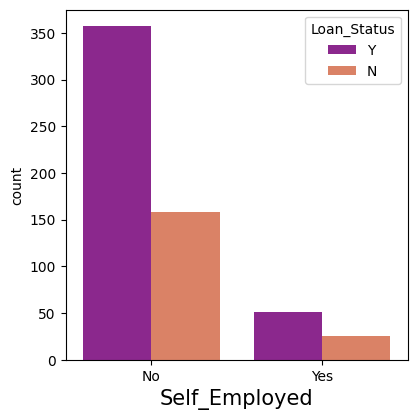

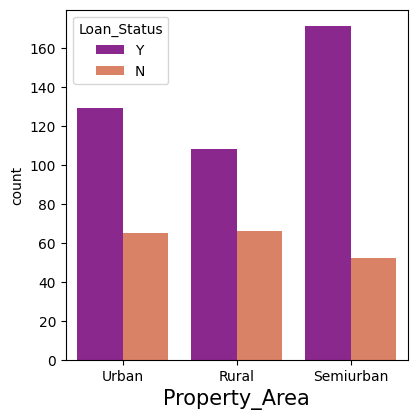

In [17]:
for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i, hue='Loan_Status', data=df, palette='plasma')
    plt.xlabel(i, fontsize = 15)


## Crosstab 

In [18]:
# plot cat dat w.r.t Target Data
print(pd.crosstab(df['Loan_Status'],df['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [19]:
# plot cat data w.r.t Target Data
print(pd.crosstab(df['Loan_Status'],df['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [20]:
# plot cat data w.r.t Target Data
print(pd.crosstab(df['Loan_Status'],df['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [21]:
# plot cat data w.r.t Target Data
print(pd.crosstab(df['Loan_Status'],df['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


## Data Preparation

In [22]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


Loan ID and Loan Status have no relation so we drop it

In [23]:
# Drop loan ID column
df.drop(columns=['Loan_ID'], inplace=True)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


## Data Encoding

In [25]:
df['Gender'] = df['Gender'].replace({'Male' :1,'Female':0})
df['Married'] = df['Married'].replace({'Yes' :1,'No':0})
df['Education'] = df['Education'].replace({'Graduate' :1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes' :1,'No':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y' :1,'N':0})


In [26]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,Urban,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,Urban,1


Here we replace urban and semiurban with 1 AND rural with 0 same for dependent column

In [27]:
df['Property_Area'] = df['Property_Area'].replace({'Urban' :1,'Rural':0,'Semiurban':1})
df['Dependents'] = df['Dependents'].replace({'0':0,'1' :1,'2':1,'3+':1})


In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


## Divide data into Dependent and Independent

In [29]:
y = df['Loan_Status']
x = df.drop(['Loan_Status'], axis =1)

In [30]:
x.shape

(591, 11)

In [31]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [32]:
# Loan status
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

Handling Imbalance Data

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
x_resample, y_resample = SMOTE().fit_resample(x,y.values.ravel())

In [35]:
print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


In [36]:
y.shape

(591,)

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, y_train, x_test, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state=42)

In [39]:
print("x train data : ", x_train.shape)
print("x test data : ", x_test.shape)

print("y train data : ", y_train.shape)
print("y test data : ", y_test.shape)

x train data :  (652, 11)
x test data :  (652,)
y train data :  (164, 11)
y test data :  (164,)


## Model Building (Logistic Regressing --> Binary classification problem)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, y_test are already defined

# Reshape y_train if necessary
if len(y_train.shape) > 1:
    y_train = y_train[:, 0]  # Assuming you want to use only the first target variable

# Initialize and train the logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# Make predictions on the test set
y_pred = lr.predict(x_test)

In [ ]:

# Calculate accuracy
print("Train Accuracy :", lr.score(x_train, y_train))
print("Test Accuracy :", lr.score(x_test,y_test))